In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

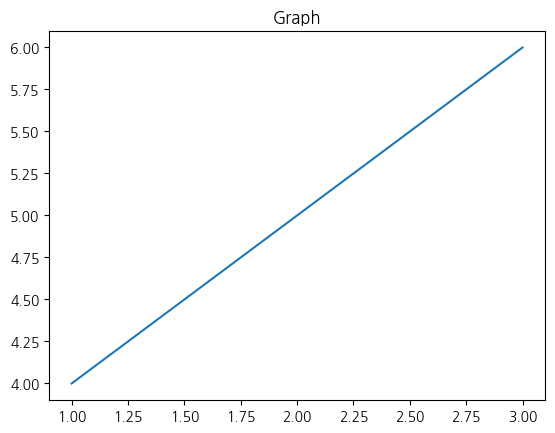

In [30]:
plt.plot([1,2,3],[4,5,6])
plt.title('Graph')
plt.show()

In [31]:
# 그래프를 노트북 안에 그리기 설정
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'NanumGothic'



In [32]:
# 폰트 확인하기
print([f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name])

['NanumGothic', 'NanumGothic', 'NanumGothic']


In [33]:
print([f.name for f in fm.fontManager.ttflist if 'Malgun' in f.name])

['Malgun Gothic', 'Malgun Gothic', 'Malgun Gothic']


In [34]:
# 데이터 불러오기
raw = pd.read_csv('../data/서울시코로나19/서울시 코로나19 확진자 현황.csv')
df = raw.copy()

C:\Users\82108\AppData\Local\Temp\ipykernel_13628\4028182031.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv('../data/서울시코로나19/서울시 코로나19 확진자 현황.csv')


In [35]:
# 데이터 확인 >> 전처리
# 컬럼별 데이터 확인
print(df.head())
# Nan 데이터 많음
print(df.columns)

      연번         확진일  환자번호  국적  환자정보  지역  여행력       접촉력  조치사항 상태 이동경로  \
0  99550  2021-09-28   NaN NaN   NaN  기타  NaN  감염경로 조사중   NaN  -  NaN   
1  99549  2021-09-28   NaN NaN   NaN  기타  NaN  감염경로 조사중   NaN  -  NaN   
2  99548  2021-09-28   NaN NaN   NaN  기타  NaN  감염경로 조사중   NaN  -  NaN   
3  99547  2021-09-28   NaN NaN   NaN  기타  NaN  감염경로 조사중   NaN  -  NaN   
4  99546  2021-09-28   NaN NaN   NaN  기타  NaN  감염경로 조사중   NaN  -  NaN   

                등록일               수정일 노출여부  
0  2021-09-29 10:54  2021-09-29 10:54    Y  
1  2021-09-29 10:54  2021-09-29 10:54    Y  
2  2021-09-29 10:54  2021-09-29 10:54    Y  
3  2021-09-29 10:54  2021-09-29 10:54    Y  
4  2021-09-29 10:54  2021-09-29 10:54    Y  
Index(['연번', '확진일', '환자번호', '국적', '환자정보', '지역', '여행력', '접촉력', '조치사항', '상태',
       '이동경로', '등록일', '수정일', '노출여부'],
      dtype='object')


In [36]:
df['이동경로'].unique()
# nan, '이동경로 공개기간 경과' 두 개의 값이 이동경로 열에 있음

array([nan, '이동경로 공개기간 경과'], dtype=object)

In [37]:
# 불필요한 컬럼 삭제
df.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','등록일',
                 '수정일','노출여부'], inplace = True)
print(df)

          연번         확진일   지역  여행력        접촉력  상태
0      99550  2021-09-28   기타  NaN   감염경로 조사중   -
1      99549  2021-09-28   기타  NaN   감염경로 조사중   -
2      99548  2021-09-28   기타  NaN   감염경로 조사중   -
3      99547  2021-09-28   기타  NaN   감염경로 조사중   -
4      99546  2021-09-28   기타  NaN   감염경로 조사중   -
...      ...         ...  ...  ...        ...  ..
99545      5  2020-01-31  성북구  NaN  기타 확진자 접촉  퇴원
99546      4  2020-01-30  마포구   중국       해외유입  퇴원
99547      3  2020-01-30  종로구  NaN   종로구 집단발병  퇴원
99548      2  2020-01-30  중랑구   중국       해외유입  퇴원
99549      1  2020-01-24  강서구   중국       해외유입  퇴원

[99550 rows x 6 columns]


In [38]:
# 자료형 변환

# 자료형 확인
print(df.dtypes)

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object


In [39]:
# 확진일 >> datetime
df['확진일'] = pd.to_datetime(df['확진일'])
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [40]:
# '지역' 공백 제거

# 지역의 고유한 값의 개수
print(df['지역'].nunique())
# 지역의 고유한 값의 목록
print(df['지역'].unique())

# 문자 양쪽 공백 제거 >> 업데이트
df['지역'] = df['지역'].str.strip()
print(df['지역'].nunique())
print(df['지역'].unique())

29


['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구' '타시도 ' ' 성북구']
27
['기타' '영등포구' '관악구' '서대문구' '송파구' '동대문구' '성동구' '중랑구' '타시도' '종로구' '도봉구' '용산구'
 '마포구' '구로구' '동작구' '강동구' '중구' '노원구' '양천구' '강서구' '은평구' '성북구' '광진구' '금천구'
 '강북구' '강남구' '서초구']


In [42]:
# 지역, 상태 >> category (지역의 공백 제거)
df['지역'] = df['지역'].astype('category')
print(df.dtypes)
print(df.info())
# 여행력     1717 non-null   object  

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB
None


In [43]:
# 결측치 분석 
print(df.isnull().sum())
# 여행력의 결측치 97833

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64


In [44]:
# 구 별 확진자 동향
# 확진일-구별 확진자 수 집계

# 피복테이블 만들기
df_gu =\
pd.pivot_table(df,
               index = '확진일',
               columns = '지역',
               values = '연번',
               aggfunc = 'count',
               margins = True)

print(df_gu)

지역                    강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구    기타  \
확진일                                                                         
2020-01-24 00:00:00     0     0     0     1     0     0     0     0     0   
2020-01-30 00:00:00     0     0     0     0     0     0     0     0     0   
2020-01-31 00:00:00     0     0     0     0     0     0     0     0     0   
2020-02-02 00:00:00     0     0     0     0     0     0     0     0     0   
2020-02-05 00:00:00     0     0     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2021-09-25 00:00:00    37    41    42    48    37    34    31    39     0   
2021-09-26 00:00:00    43    17    27    29    37    37    72    19     0   
2021-09-27 00:00:00    50    29    20    50    23    34    58    16     0   
2021-09-28 00:00:00    45    51    25    41    48    36    55    31    65   
All                  6926  3782  2606  4447  5418  3486  4168  2064  2321   

In [45]:
# 서울시 일별 추가 확진자 동향
print(df_gu['All'])
print()
print(df_gu['All'][:-1])
s_date = df_gu['All'][:-1]

확진일
2020-01-24 00:00:00        1
2020-01-30 00:00:00        3
2020-01-31 00:00:00        3
2020-02-02 00:00:00        1
2020-02-05 00:00:00        2
                       ...  
2021-09-25 00:00:00      928
2021-09-26 00:00:00      778
2021-09-27 00:00:00      842
2021-09-28 00:00:00     1054
All                    99550
Name: All, Length: 583, dtype: int64

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-09-24    1222
2021-09-25     928
2021-09-26     778
2021-09-27     842
2021-09-28    1054
Name: All, Length: 582, dtype: int64


In [46]:
# 서울시 일별 추가확진자가 많았던 순으로 보기
s_date.sort_values(ascending = False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

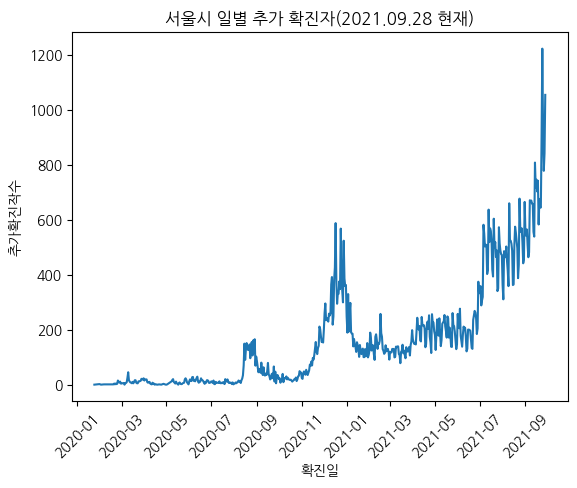

In [47]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index    # 일자
y = s_date.values   # 확진자 수

plt.plot(x,y)
plt.title('서울시 일별 추가 확진자(2021.09.28 현재)')
plt.xlabel('확진일')
plt.ylabel('추가확진작수')
plt.xticks(rotation = 45)
plt.show()

In [48]:
# 서울시 구별 누적확진자 비교
s_gu = df_gu.loc['All'][:-1]
# df_gu DataFrame에서 'All' 행을 제외한 모든 행을 선택하는 코드 
# [:-1]는 슬라이싱을 사용하여 'All' 행을 제외한 마지막 행까지 선택
s_gu

지역
강남구     6926
강동구     3782
강북구     2606
강서구     4447
관악구     5418
광진구     3486
구로구     4168
금천구     2064
기타      2321
노원구     3932
도봉구     2605
동대문구    3487
동작구     4120
마포구     3726
서대문구    2692
서초구     4284
성동구     2839
성북구     3779
송파구     6356
양천구     3291
영등포구    4463
용산구     2705
은평구     4284
종로구     1617
중구      1708
중랑구     3729
타시도     4715
Name: All, dtype: int64

In [49]:
# 서울시 구별 누적확진자가 많은 순으로 보기
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

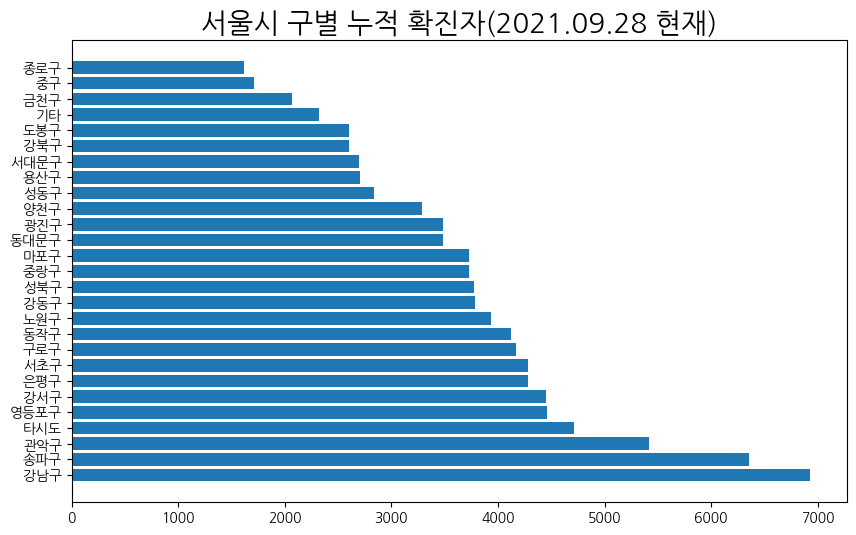

In [50]:
# 서울시 구별 누적확진자 시각화

x = s_gu.index  # 서울시 구
y = s_gu.values # 누적 확진자 수

plt.figure(figsize = (10,6))
plt.title('서울시 구별 누적 확진자(2021.09.28 현재)', size = 20)
plt.barh(x,y)
plt.show()

In [51]:
# 최근일 기준, 지역별 추가 확진자
print(df_gu)
print()
print(df_gu.iloc[-2])
# 행 기준 마지막에서 두번째의 행을 선택
print(df_gu.iloc[-2][:-1])  # 선택한 행의 마지막 열 제외
# 'All'이 빠진다는 것을 알 수 있다. 

지역                    강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구    기타  \
확진일                                                                         
2020-01-24 00:00:00     0     0     0     1     0     0     0     0     0   
2020-01-30 00:00:00     0     0     0     0     0     0     0     0     0   
2020-01-31 00:00:00     0     0     0     0     0     0     0     0     0   
2020-02-02 00:00:00     0     0     0     0     0     0     0     0     0   
2020-02-05 00:00:00     0     0     0     0     0     0     0     0     0   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2021-09-25 00:00:00    37    41    42    48    37    34    31    39     0   
2021-09-26 00:00:00    43    17    27    29    37    37    72    19     0   
2021-09-27 00:00:00    50    29    20    50    23    34    58    16     0   
2021-09-28 00:00:00    45    51    25    41    48    36    55    31    65   
All                  6926  3782  2606  4447  5418  3486  4168  2064  2321   

In [54]:
s_gu = df_gu.iloc[-2][:-1]
s_gu = s_gu.sort_values(ascending = False)
s_gu 

지역
송파구     68
동대문구    66
기타      65
구로구     55
강동구     51
관악구     48
마포구     47
은평구     47
강남구     45
타시도     43
영등포구    43
성북구     41
강서구     41
중구      37
광진구     36
도봉구     35
금천구     31
서대문구    30
노원구     29
동작구     28
양천구     27
중랑구     26
강북구     25
성동구     24
용산구     24
종로구     23
서초구     19
Name: 2021-09-28 00:00:00, dtype: int64

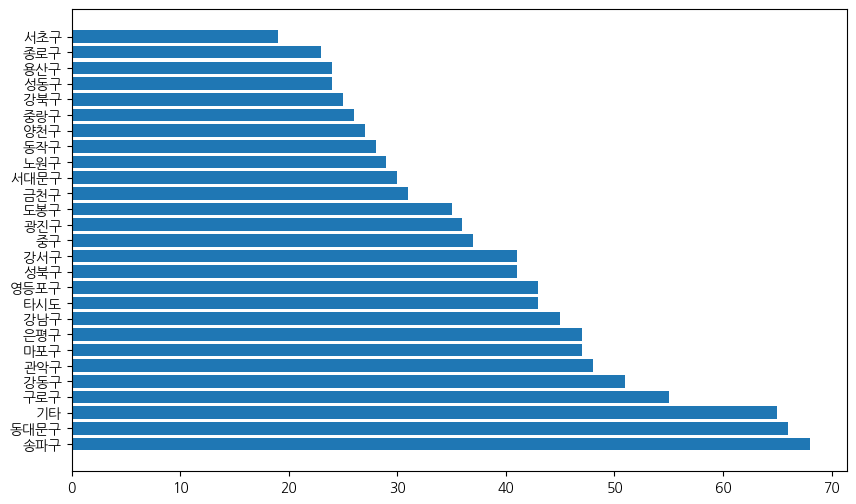

In [55]:
# 시각화 
x = s_gu.index
y = s_gu.values 
plt.figure(figsize=(10,6))
plt.barh(x,y)
plt.show()

In [58]:
# 접촉력에 따른 확진 분석
# 접촉력에 따른 확진 건수 베스트 10 선정
print(df['접촉력'])
print(df['접촉력'].value_counts()[:10].to_frame())
# counts를 하면 내림차순으로 나옴

0         감염경로 조사중
1         감염경로 조사중
2         감염경로 조사중
3         감염경로 조사중
4         감염경로 조사중
           ...    
99545    기타 확진자 접촉
99546         해외유입
99547     종로구 집단발병
99548         해외유입
99549         해외유입
Name: 접촉력, Length: 99550, dtype: object
                      count
접촉력                        
기타 확진자 접촉             37943
감염경로 조사중              31964
타시도 확진자 접촉             4244
해외유입                   1729
동부구치소 관련               1175
병원 및 요양시설               988
송파구 소재 시장 관련(?21.9.)    659
성북구 사랑제일교회 관련           641
중구 소재 시장 관련(?21.9.)     277
강서구 교회 관련               246


In [59]:
# 최근 월 접촉력에 따른 확진 건수 베스트 10선정
# 2021-09
print(df['확진일'])
condition = (df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)
print(df[condition])

0       2021-09-28
1       2021-09-28
2       2021-09-28
3       2021-09-28
4       2021-09-28
           ...    
99545   2020-01-31
99546   2020-01-30
99547   2020-01-30
99548   2020-01-30
99549   2020-01-24
Name: 확진일, Length: 99550, dtype: datetime64[ns]
          연번        확진일   지역  여행력        접촉력  상태
0      99550 2021-09-28   기타  NaN   감염경로 조사중   -
1      99549 2021-09-28   기타  NaN   감염경로 조사중   -
2      99548 2021-09-28   기타  NaN   감염경로 조사중   -
3      99547 2021-09-28   기타  NaN   감염경로 조사중   -
4      99546 2021-09-28   기타  NaN   감염경로 조사중   -
...      ...        ...  ...  ...        ...  ..
19529  80021 2021-09-01  동작구  NaN   감염경로 조사중  퇴원
19530  80020 2021-09-01  중랑구  NaN   감염경로 조사중  퇴원
19531  80019 2021-09-01  동작구  NaN  기타 확진자 접촉   -
19532  80018 2021-09-01  중랑구  NaN   감염경로 조사중  퇴원
19533  80017 2021-09-01  타시도  NaN  기타 확진자 접촉  퇴원

[19534 rows x 6 columns]


In [60]:
condition = (df['확진일'].dt.year == 2021) & (df['확진일'].dt.month == 9)
print(df[condition]['접촉력'].value_counts()[:10].to_frame())

                      count
접촉력                        
감염경로 조사중               8117
기타 확진자 접촉              8088
송파구 소재 시장 관련(?21.9.)    658
타시도 확진자 접촉              587
중구 소재 시장 관련(?21.9.)     277
병원 및 요양시설               186
해외유입                    122
용산구 소재 병원 관련(?21.9.)     77
동대문구 소재 시장 관련            44
강서구 소재 시장 관련             44
